In [1]:
from datascience import *
%matplotlib inline
#path_data = '../data/'
path_data = 'data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# 통계량의 경험적 분포
대수의 법칙은 높은 확률로 대규모 무작위 표본의 경험적 분포가 표본이 추출된 모집단의 분포와 닮을 것임을 의미합니다.

유사성은 두 개의 히스토그램에서 볼 수 있습니다: 대규모 무작위 표본의 경험적 히스토그램은 모집단의 히스토그램과 닮을 가능성이 높습니다.

복습으로, 다음은 `united`의 모든 항공편 지연의 히스토그램과 이 항공편 중 1,000편의 무작위 표본의 지연에 대한 경험적 히스토그램입니다.

In [3]:
united = Table.read_table(path_data + 'united_summer2015.csv')

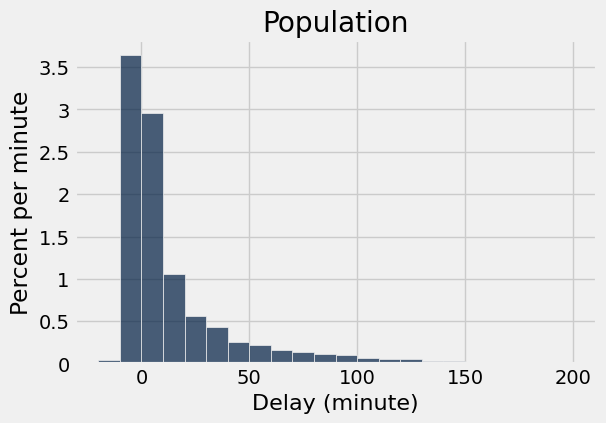

In [4]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Population');

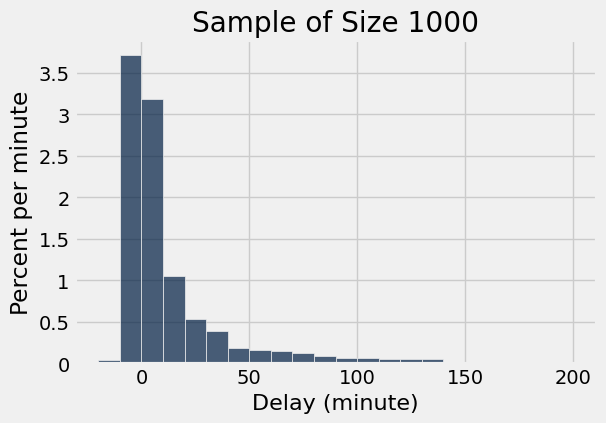

In [21]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000');

두 히스토그램은 명확히 서로 닮았지만 동일하지는 않습니다.

## 모수
우리는 종종 모집단과 관련된 수치적 양에 관심이 있습니다.
- 유권자 모집단에서 후보 A에게 투표할 비율은 얼마입니까?
- Facebook 사용자 모집단에서 사용자들이 가진 Facebook 친구의 최대 수는 얼마입니까?
- United 항공편 모집단에서 출발 지연의 중앙값은 얼마입니까?

모집단과 관련된 수치적 양을 *모수*라고 합니다. `united`의 항공편 모집단에 대해 우리는 "중앙값 지연" 모수의 값을 알고 있습니다:

In [ ]:
np.median(united.column('Delay'))

2.0

`NumPy` 함수 `median`은 배열의 중앙값(중간 지점)을 반환합니다. `united`의 모든 항공편 중 중앙값 지연은 2분이었습니다. 즉, 모집단의 약 50% 항공편이 2분 이하의 지연을 가졌습니다:

In [8]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

모든 항공편의 절반이 예정된 출발 시간보다 2분 이내에 출발했습니다. 이것은 매우 짧은 지연입니다!

**참고.** 백분율이 정확히 50%가 아닌 이유는 "동점" 때문입니다. 즉, 정확히 2분 지연된 항공편이 있기 때문입니다. 그러한 항공편은 480편이었습니다. 동점은 데이터셋에서 매우 흔하며, 이 과정에서는 이에 대해 걱정하지 않을 것입니다.

In [9]:
united.where('Delay', are.equal_to(2)).num_rows

480

## 통계량
많은 상황에서 우리는 알려지지 않은 모수의 값을 알아내는 데 관심이 있습니다. 이를 위해 모집단에서 추출된 대규모 무작위 표본의 데이터에 의존할 것입니다.

*통계량*(단수형에 주의!)은 표본의 데이터를 사용하여 계산된 모든 수입니다. 따라서 표본 중앙값은 통계량입니다.

`sample_1000`은 `united`에서 1000편의 항공편의 무작위 표본을 포함한다는 것을 기억하세요. 표본 중앙값의 관찰값은 다음과 같습니다:

In [16]:
np.median(sample_1000.column('Delay'))

3.0

우리의 표본 – 1,000편의 항공편의 한 세트 – 은 통계량의 한 관찰값을 제공했습니다. 이것은 중요한 추론 문제를 제기합니다:

**통계량은 달라질 수 있었습니다.**
무작위 표본을 기반으로 하는 통계량을 사용할 때 근본적인 고려사항은 *표본이 다르게 나올 수 있었다*는 것이며, 따라서 통계량도 다르게 나올 수 있었다는 것입니다.

In [41]:
np.median(united.sample(1000).column('Delay'))

3.0

위의 셀을 몇 번 실행하여 답이 어떻게 달라지는지 확인해보세요. 종종 모집단 모수와 동일한 값인 2와 같습니다. 그러나 때로는 다릅니다.

**통계량이 얼마나 달라질 수 있었을까요?** 이에 답하는 한 가지 방법은 통계량을 여러 번 시뮬레이션하고 값을 기록하는 것입니다. 이러한 값의 히스토그램은 통계량의 분포에 대해 알려줄 것입니다.

시뮬레이션의 주요 단계를 상기해봅시다.

## 통계량 시뮬레이션
시뮬레이션을 연구하기 시작했을 때 이전 장에서 설정한 단계를 사용하여 표본 중앙값을 시뮬레이션할 것입니다. 표본 크기 1000을 다른 표본 크기로 바꿀 수 있으며 표본 중앙값을 다른 통계량으로 바꿀 수 있습니다.

**1단계: 시뮬레이션할 통계량 결정.** 이미 결정했습니다: 비행 지연 모집단에서 추출된 크기 1000의 무작위 표본의 중앙값을 시뮬레이션할 것입니다.

**2단계: 통계량의 시뮬레이션된 값 하나를 반환하는 함수 정의.** 크기 1000의 무작위 표본을 추출하고 표본의 중앙값을 계산합니다. 위의 코드 셀에서 이것을 했습니다. 여기에 함수로 캡슐화된 것이 다시 있습니다.

In [42]:
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

**3단계: 생성할 시뮬레이션된 값의 수 결정.** 5,000번 반복해봅시다.

**4단계: `for` 루프를 사용하여 시뮬레이션된 값의 배열 생성.** 항상 그렇듯이 결과를 수집할 빈 배열을 만드는 것부터 시작합니다. 그런 다음 모든 시뮬레이션된 값을 생성하기 위한 `for` 루프를 설정합니다. 루프의 본문은 표본 중앙값의 시뮬레이션된 값을 하나 생성하고 이를 수집 배열에 추가하는 것으로 구성됩니다.

시뮬레이션은 실행하는 데 상당한 시간이 걸립니다. 크기 1000의 표본을 추출하고 중앙값을 계산하는 과정을 5000번 반복하기 때문입니다. 그것은 많은 표본추출과 반복입니다!

In [43]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

시뮬레이션이 완료되었습니다. 5,000개의 시뮬레이션된 표본 중앙값이 모두 배열 `medians`에 수집되었습니다. 이제 결과를 시각화할 시간입니다.

## 시각화

다음은 테이블 `simulated_medians`에 표시된 시뮬레이션된 무작위 표본 중앙값입니다.

In [44]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
2
3
3
1
2
2
3
2
2
3


히스토그램을 사용하여 시뮬레이션된 데이터를 시각화할 수도 있습니다. 히스토그램은 *통계량의 경험적 히스토그램*이라고 합니다. 통계량의 *경험적 분포*를 표시합니다. *경험적*은 *관찰된*을 의미한다는 것을 기억하세요.

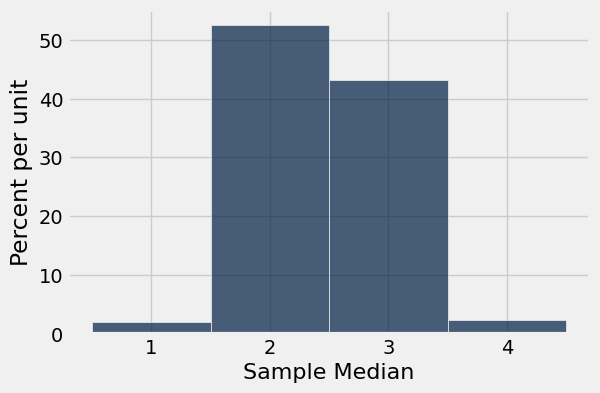

In [45]:
simulated_medians.hist(bins=np.arange(0.5, 5, 1))

표본 중앙값이 모집단 중앙값의 값인 약 2가 될 가능성이 매우 높다는 것을 알 수 있습니다. 1000편의 비행 지연 표본이 지연 모집단과 닮을 가능성이 높으므로 이러한 표본의 중앙값 지연이 모집단의 중앙값 지연에 가까워야 한다는 것은 놀라운 일이 아닙니다.

이것은 통계량이 모수의 좋은 추정치를 제공할 수 있는 방법의 예입니다.

## 시뮬레이션의 힘

크기 1000의 가능한 모든 무작위 표본을 생성할 수 있다면 통계량(표본 중앙값)의 모든 가능한 값과 이러한 모든 값의 확률을 알 수 있습니다. 통계량의 확률 히스토그램으로 모든 값과 확률을 시각화할 수 있습니다.

그러나 이것을 포함한 많은 상황에서 가능한 모든 표본의 수는 컴퓨터의 용량을 초과할 정도로 크며 확률의 순수 수학적 계산은 다루기 어려울 수 있습니다.

이것이 경험적 히스토그램이 유용한 이유입니다.

대수의 법칙에 의해 표본 크기가 크고 무작위 표본추출 과정을 여러 번 반복하면 통계량의 경험적 히스토그램이 통계량의 확률 히스토그램과 닮을 가능성이 높다는 것을 알고 있습니다.

이것은 무작위 과정을 반복적으로 시뮬레이션하는 것이 *확률을 수학적으로 계산하거나 가능한 모든 무작위 표본을 생성하지 않고도* 확률 분포를 근사하는 방법이라는 것을 의미합니다. 따라서 컴퓨터 시뮬레이션은 데이터 과학에서 강력한 도구가 됩니다. 다른 방법으로는 분석하기 복잡한 무작위 양의 속성을 데이터 과학자가 이해하는 데 도움이 될 수 있습니다.